# Test the Retrained model


In [1]:
!pip install ultralytics
from ultralytics import YOLO
from PIL import Image


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#use the 'best' re-trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

In [15]:
def predictAccident(carImage):

    results = model.predict(carImage)
    result = results[0]
    print("---")
    print("number of detected objects: " + str(len(result.boxes)))
    print("---")
    box = result.boxes[0]
         
    #write code to get this info (for all of our detected boxes) in a loop
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")
        
    #In the photo place boxes listing name, probability around each car (object type)
    return Image.fromarray(result.plot()[:,:,::-1])
  


image 1/1 /opt/app-root/src/car-accident-detection/test/images/car343_jpg.rf.388048f3834f818fce4519487a35a65e.jpg: 384x640 2 not_accidents, 409.3ms
Speed: 1.4ms preprocess, 409.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
---
number of detected objects: 2
---
Object type: not_accident
Coordinates: [1, 36, 268, 134]
Probability: 0.61
---
Object type: not_accident
Coordinates: [0, 38, 191, 133]
Probability: 0.35
---


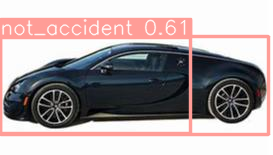

In [16]:
#no accident

carImage = "test/images/car343_jpg.rf.388048f3834f818fce4519487a35a65e.jpg"

predictAccident(carImage)



image 1/1 /opt/app-root/src/car-accident-detection/test/images/car116_jpg.rf.c06b162daff687a870c0f5d7b40ce62b.jpg: 448x640 1 accident, 1 not_accident, 378.3ms
Speed: 1.9ms preprocess, 378.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
---
number of detected objects: 2
---
Object type: accident
Coordinates: [89, 64, 347, 210]
Probability: 0.72
---
Object type: not_accident
Coordinates: [0, 60, 88, 238]
Probability: 0.52
---


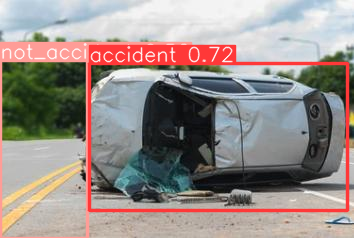

In [17]:
#accident

carImage = "test/images/car116_jpg.rf.c06b162daff687a870c0f5d7b40ce62b.jpg"

predictAccident(carImage)